**Chess Endgame Classification – King-Rook vs. King-Pawn**

Classifying chess endgame positions involving King-Rook vs. King-Pawn into two categories:  
"won": The King-Rook side can force a win.  
"nowin": The King-Rook side cannot force a win.  
This notebook uses machine learning techniques to perform the classification.

In [21]:
# Core libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [23]:
# Load the dataset
column_names = [f"feature_{i}" for i in range(36)] + ["class"]
data = pd.read_csv("/content/kr-vs-kp.data", names=column_names)

print(data.info())
print(data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3196 entries, 0 to 3195
Data columns (total 37 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   feature_0   3196 non-null   object
 1   feature_1   3196 non-null   object
 2   feature_2   3196 non-null   object
 3   feature_3   3196 non-null   object
 4   feature_4   3196 non-null   object
 5   feature_5   3196 non-null   object
 6   feature_6   3196 non-null   object
 7   feature_7   3196 non-null   object
 8   feature_8   3196 non-null   object
 9   feature_9   3196 non-null   object
 10  feature_10  3196 non-null   object
 11  feature_11  3196 non-null   object
 12  feature_12  3196 non-null   object
 13  feature_13  3196 non-null   object
 14  feature_14  3196 non-null   object
 15  feature_15  3196 non-null   object
 16  feature_16  3196 non-null   object
 17  feature_17  3196 non-null   object
 18  feature_18  3196 non-null   object
 19  feature_19  3196 non-null   object
 20  feature_

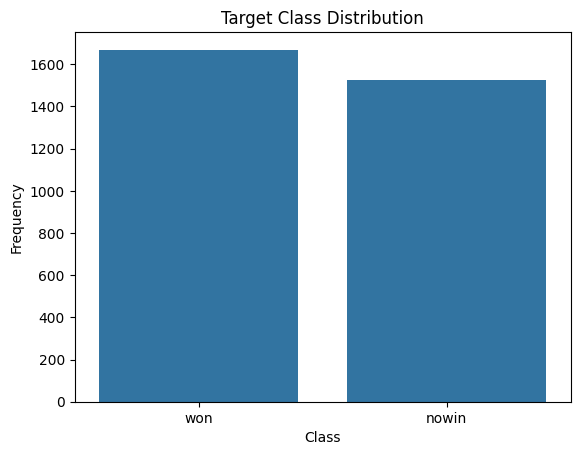

In [24]:
# Exploratory Data Analysis (EDA)
sns.countplot(x=data['class'])
plt.title("Target Class Distribution")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

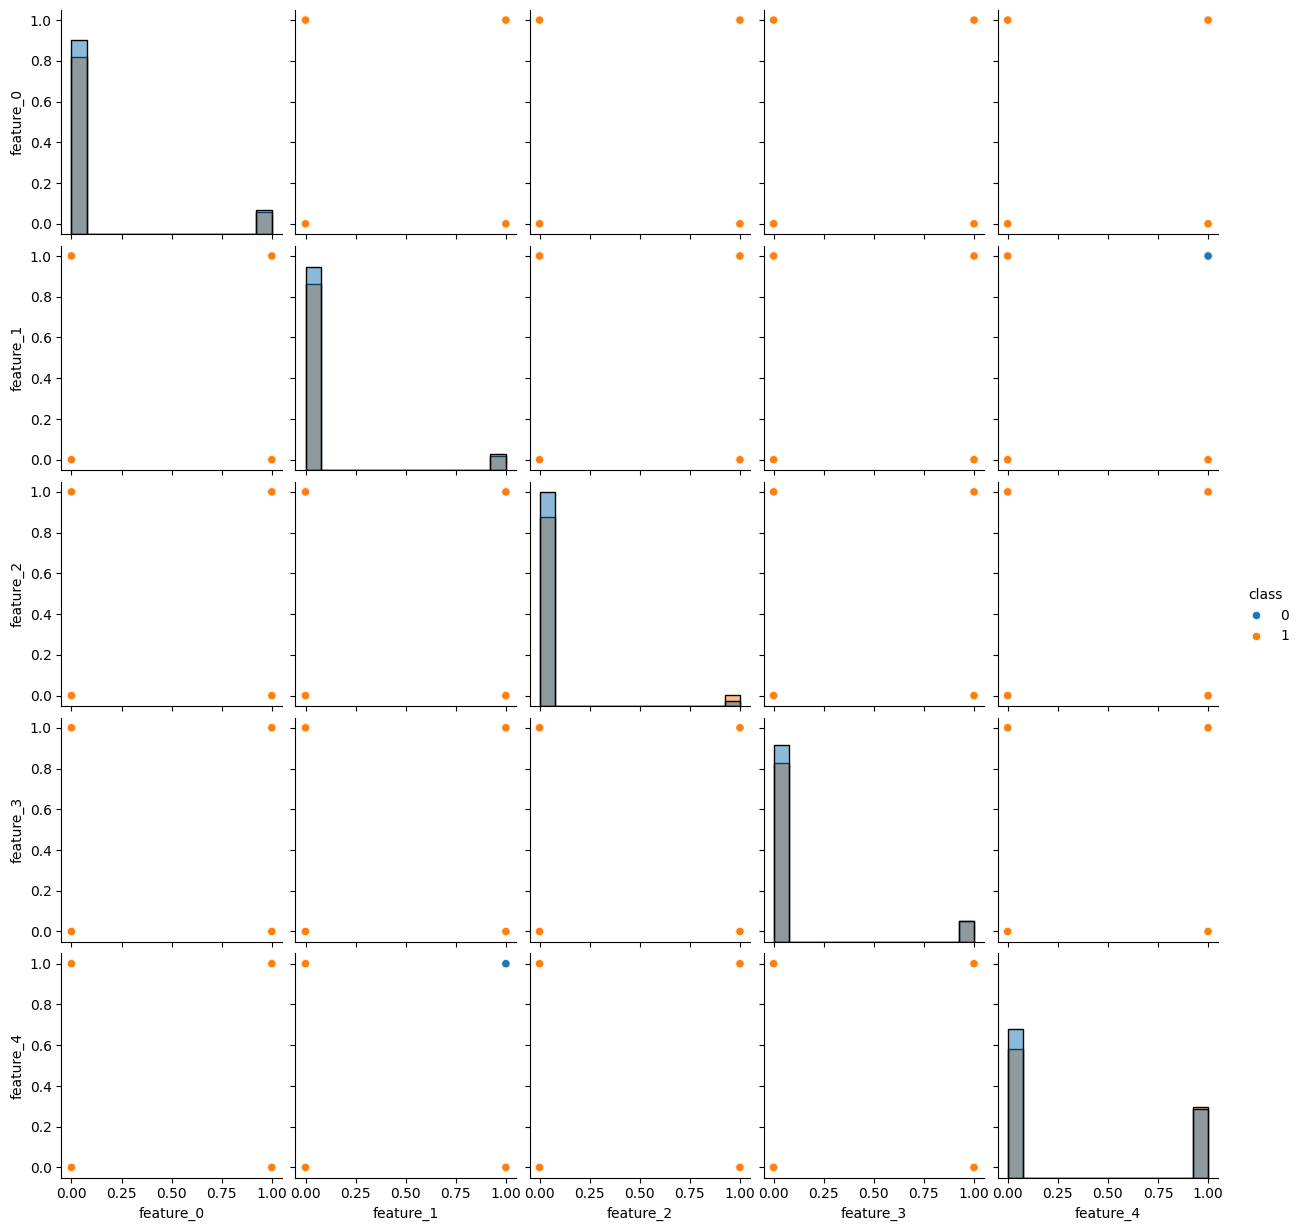

In [25]:
# Feature Relationships (Pairplot)
data_temp = data.copy()
data_temp['class_factorized'] = data_temp['class'].factorize()[0]
for col in data_temp.columns[:-1]:
    data_temp[col] = data_temp[col].factorize()[0]

# Pairplot with the first 5 features
sns.pairplot(data_temp.loc[:, data_temp.columns[:5].tolist() + ['class']], hue='class', diag_kind='hist')
plt.show()


In [26]:
# Data Preprocessing
# Map the target variable to binary values (won -> 1, nowin -> 0)
data['class'] = data['class'].map({'won': 1, 'nowin': 0})


data_encoded = pd.get_dummies(data.drop(columns=['class']))

# Split the dataset into features (X) and target (y)
X = data_encoded
y = data['class']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the datasets
print(f"Training Features Shape: {X_train.shape}")
print(f"Testing Features Shape: {X_test.shape}")


Training Features Shape: (2556, 73)
Testing Features Shape: (640, 73)


In [37]:
# Model Training
results = {}
detailed_metrics = {}

for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    results[model_name] = acc

    # Get precision, recall, and F1-score from classification report
    report = classification_report(y_test, y_pred, output_dict=True)
    detailed_metrics[model_name] = {
        "Precision": report["macro avg"]["precision"],
        "Recall": report["macro avg"]["recall"],
        "F1-score": report["macro avg"]["f1-score"]
    }
    print(f"Accuracy for {model_name}: {acc:.2f}")
    print(classification_report(y_test, y_pred))
    print("-" * 50)

print("Training and evaluation completed.")

Training Logistic Regression...
Accuracy for Logistic Regression: 0.95
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       300
           1       0.97      0.92      0.95       340

    accuracy                           0.95       640
   macro avg       0.95      0.95      0.95       640
weighted avg       0.95      0.95      0.95       640

--------------------------------------------------
Training Support Vector Machine (SVM)...
Accuracy for Support Vector Machine (SVM): 0.95
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       300
           1       0.97      0.93      0.95       340

    accuracy                           0.95       640
   macro avg       0.95      0.95      0.95       640
weighted avg       0.95      0.95      0.95       640

--------------------------------------------------
Training K-Nearest Neighbors (KNN)...
Accuracy for K-Nearest Neighbors (KNN): 0.95
 

<ipython-input-35-90fd1fea08cb>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=accuracies, y=model_names, palette='viridis')


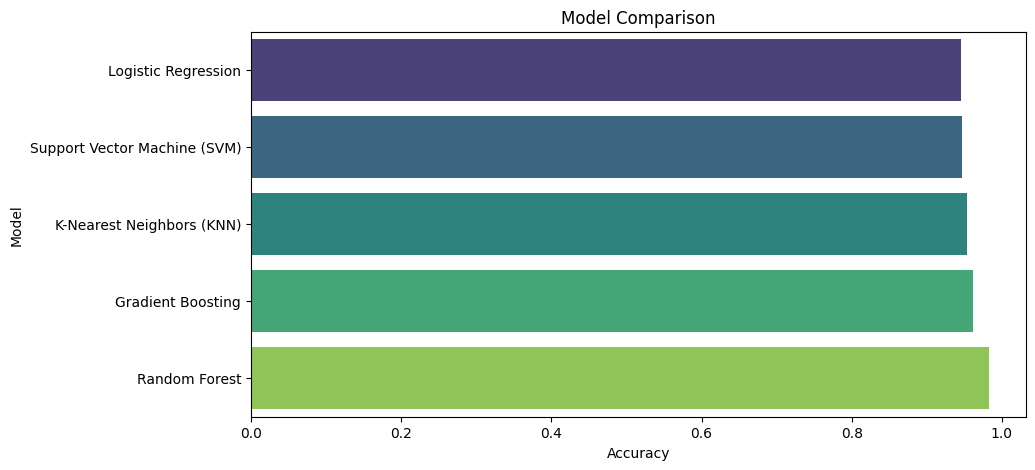

In [35]:
# Model Comparison
# Compare performance of all models
model_names = list(results.keys())
accuracies = list(results.values())

plt.figure(figsize=(10, 5))
sns.barplot(x=accuracies, y=model_names, palette='viridis')
plt.xlabel("Accuracy")
plt.ylabel("Model")
plt.title("Model Comparison")
plt.show()


Model Performance Metrics:
                              Precision    Recall  F1-score
Random Forest                  0.982514  0.983039  0.982755
Gradient Boosting              0.960685  0.962451  0.960887
K-Nearest Neighbors (KNN)      0.953580  0.952353  0.952882
Support Vector Machine (SVM)   0.946373  0.947843  0.946773
Logistic Regression            0.945059  0.946765  0.945242


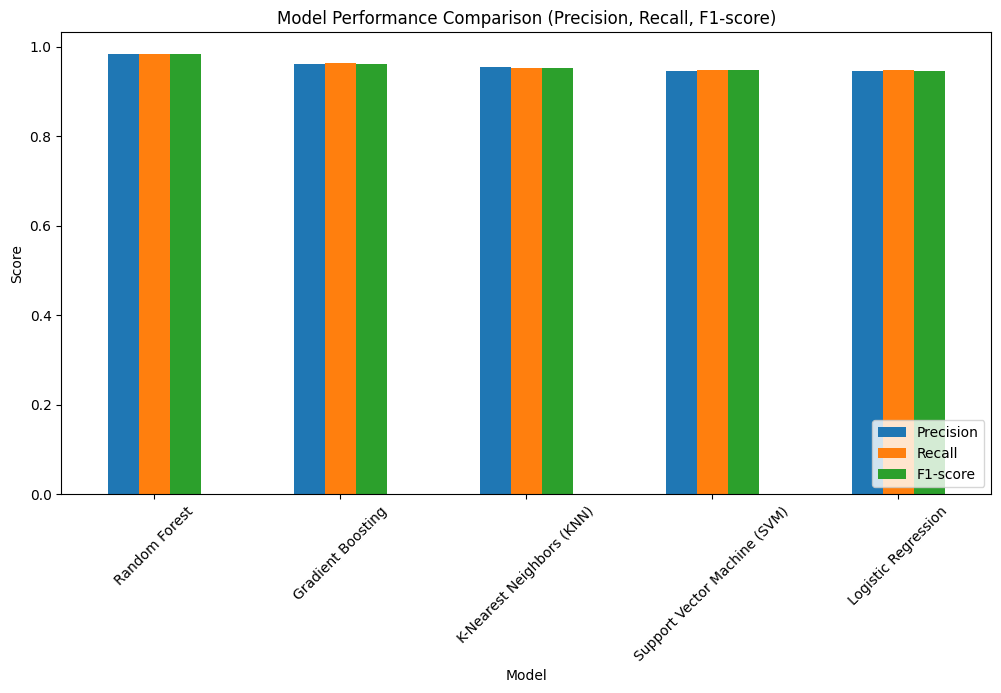

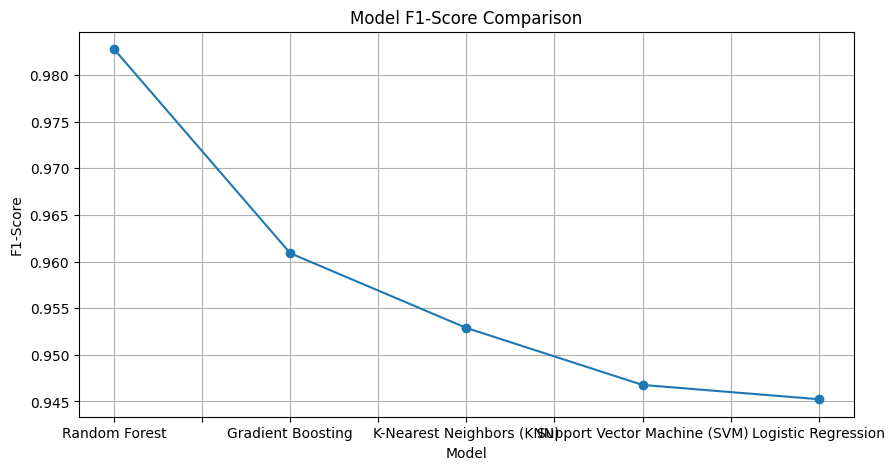

In [38]:
# Model Comparison
metrics_df = pd.DataFrame(detailed_metrics).T
metrics_df = metrics_df.sort_values(by="F1-score", ascending=False)

print("Model Performance Metrics:")
print(metrics_df)

# Plot comparison of precision, recall, and F1-score
metrics_df.plot(kind="bar", figsize=(12, 6))
plt.title("Model Performance Comparison (Precision, Recall, F1-score)")
plt.ylabel("Score")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.show()

# Plot only F1-score
metrics_df["F1-score"].plot(kind="line", marker='o', figsize=(10, 5))
plt.title("Model F1-Score Comparison")
plt.ylabel("F1-Score")
plt.xlabel("Model")
plt.grid()
plt.show()


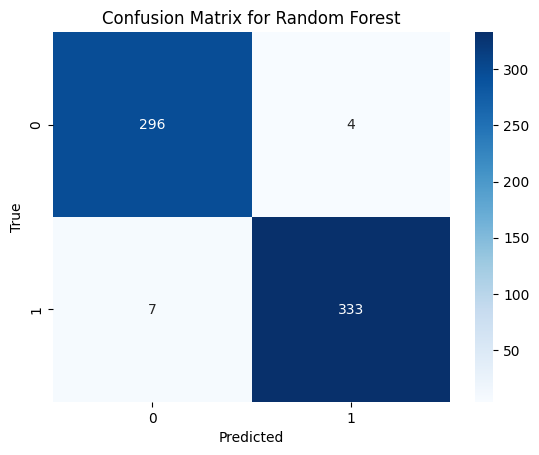

In [31]:
# Confusion Matrix to pick the Best Model
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]

# Confusion matrix
y_pred_best = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_best)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f"Confusion Matrix for {best_model_name}")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


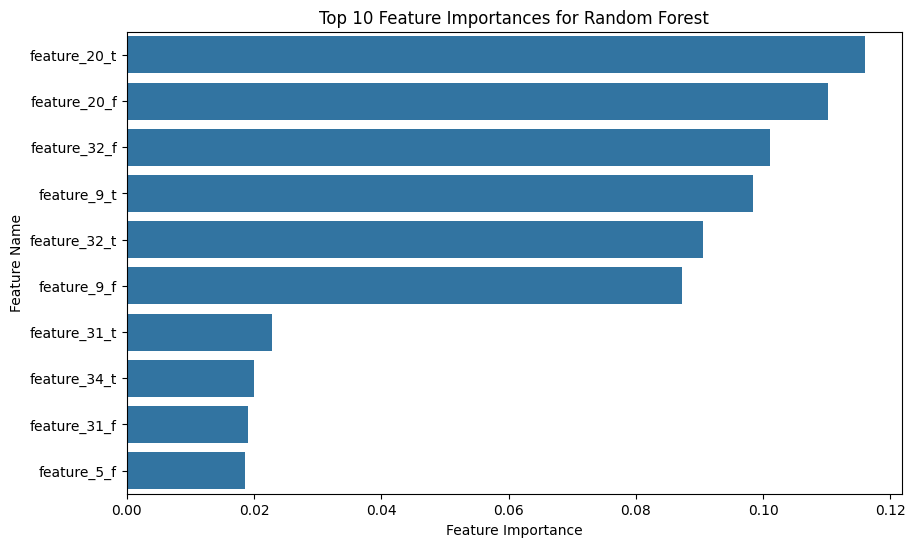

In [40]:
# Feature importance from Random Forest
if hasattr(best_model, 'feature_importances_'):
    importances = best_model.feature_importances_
    feature_names = X.columns
    sorted_indices = np.argsort(importances)[::-1]

    # Plot top 10 features
    plt.figure(figsize=(10, 6))
    sns.barplot(x=importances[sorted_indices[:10]], y=feature_names[sorted_indices[:10]])
    plt.title(f"Top 10 Feature Importances for {best_model_name}")
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature Name")
    plt.show()



**Summary and Insights**  
The chess endgame classification task effectively predicts whether White (King and Rook) can force a win against Black (King and Pawn). The Random Forest Classifier is shown to be the best model, it has the highest accuracy of 98% and an F1-score of 0.98. It outperformed other models, including Gradient Boosting (96% accuracy), Logistic Regression and SVM (94–95% accuracy). Random Forest's better performance is attributed to its suitability for capturing complex feature interactions in dataset.   
Key features influencing the outcome include the pawn’s proximity to promotion (feature_20_t/feature_20_f) and control of critical squares (feature_32_t/feature_32_f), highlighting important chess endgame concepts. With only 11 misclassifications in 640 test samples, Random Forest demonstrated high reliability.  

Side notes 1: I just want to say as an avid chess player, I just realy wanted to do this project. while I wasn't able to discern the exact positions of the 3000+ end games for me to analyze, nor actually much of anything to do with chess at all. There still could be some takeaways (maybe I already know). Like the importance of pawn progression, and just how much is a pawn worth on the 7th rank.

Side notes 2: Through out the project I am actually a bit confused as to what it is required for me to submit, as there are not definite instructions. What i did was piece together what I learnt with the modeling and data training. So first understand the data, the preprocess it, train a model,  evaluate it, and  finally conclusion.